# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">1 hour</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">2 hours</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">2 hours</span>
* B. Hough Transform (Circles):  <span style="color:red;">16 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

In [1]:
# import packages
import numpy as np
from scipy import ndimage
from scipy import signal
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [2]:
def color2gray(image_path):
    
    image = cv2.imread(image_path)
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2] # <- OpenCV reads them as b, g, r

    gray = 0.299*r + 0.587*g + 0.114*b

    return gray

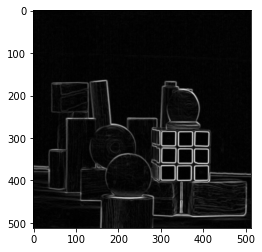

In [3]:
# Part 1. Compute the Gradient Magnitude

def gradient_mag(img_path):
    
    img = color2gray(img_path)
    img_filt = cv2.GaussianBlur(img,(3,3), 2)
    
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    

    
    x=ndimage.convolve(img_filt,kernel_x)
    y=ndimage.convolve(img_filt,kernel_y)
    
    grad = np.hypot(x, y)
    
    grad = grad / grad.max() * 255
    
    return grad


# Show your results on the blocks image

plt.imshow(gradient_mag('blocks.png'),cmap=plt.cm.gray)
plt.show()

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

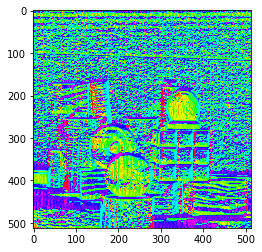

In [4]:
# Part 2. Compute the Gradient Orientation

def grad_orientation(img_path):
    
    img = color2gray(img_path)

    img_filt = cv2.GaussianBlur(img,(3,3), 2)
    
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    

    
    x=ndimage.convolve(img_filt,kernel_x)
    y=ndimage.convolve(img_filt,kernel_y)
    
    theta = np.arctan2(y, x)
    
    return np.arctan2(y, x) * (180/np.pi)

# Show your results on the blocks image

output_orientation = grad_orientation('blocks.png')
plt.imshow(output_orientation,cmap="hsv")
plt.show()

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



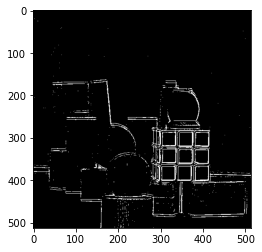

In [5]:
# Part 3. Find the Zero Crossings

# Is my kernel correct or do I need to use the one with the 4 in the middle instead?

def laplacian_filter(img_path, thresh):
    img = color2gray(img_path)
    img_filt = cv2.GaussianBlur(img,(3,3), 3)
    
    
    kernel_lap = np.array([[0,1,0],
                           [1,-4,1],
                           [0,1,0]])
    
    output = ndimage.convolve(img_filt,kernel_lap)
    
    lap = np.pad(output, pad_width=1)
    diff_x = lap[:-1, :-1] - lap[:-1, 1:] < -thresh
    diff_y = lap[:-1, :-1] - lap[1:, :-1] < -thresh

    crossings =  np.logical_or(diff_x, diff_y).astype(float)
    
    
    return crossings

# Show the results on blocks image
output_lap = laplacian_filter('blocks.png',8)
plt.imshow(output_lap,cmap=plt.cm.gray)
plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


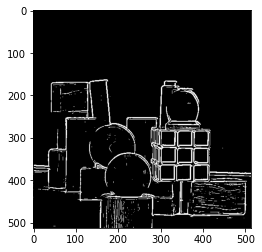

In [6]:
# Part 4. Final Solution

def combined_filter(image, thresh):
    grads = gradient_mag(image)
    
    grads_pad = np.pad(grads, pad_width=1)
    diff_x = grads_pad[:-1, :-1] - grads_pad[:-1, 1:] < -thresh
    diff_y = grads_pad[:-1, :-1] - grads_pad[1:, :-1] < -thresh

    crossings =  np.logical_or(diff_x, diff_y).astype(float)
    return crossings
# Show the results on blocks image
out_ = combined_filter('blocks.png', 12)
plt.imshow(out_,cmap=plt.cm.gray)
plt.show()

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>



***Response:*** The first time I attempted to filter the images, I did it without doing any preprocessing (smoothing) and the results did not turn out so well. I also noticed that the gradient orientation is significantly better when the plt.imshow is set to the "hsv" channels. 

The results look satisfactory in each of the outputs and I was able to tinker with the thresholds to get the best edge detection in the final function. 

<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [7]:
class Circles:
    
    def __init__(self, file):
        self.img = cv2.imread(file)
        
    def preprocess_img(self):
        blur = cv2.medianBlur(self.img, 3)
        med = cv2.blur(blur,(3,3))
        b,g,r = cv2.split(med)
    
        B_cny = cv2.Canny(b, 200, 200)
        G_cny = cv2.Canny(g, 150, 200)
        R_cny = cv2.Canny(r, 50, 200)
        img_cny = cv2.merge([B_cny, G_cny, R_cny])
        
        return img_cny

In [8]:
img1 = Circles('circles.png')

b = img1.preprocess_img()

r, g, b = b[:, :, 0], b[:, :, 1], b[:, :, 2]

gray = 0.299*r + 0.587*g + 0.114*b

In [15]:
def hough_circles(img, radius, thresh):
    
    acc = np.pad(np.zeros(img.shape), pad_width=32)
    circle_arr = np.pad(np.zeros(img.shape), pad_width=32)
    img_pad = np.pad(img, pad_width=32)
    
    for ii in range(img_pad.shape[0]):
        for jj in range(img_pad.shape[1]):
            if img_pad[ii,jj] > 0:
                cv2.circle(circle_arr, (jj, ii), radius=radius, color=1)
                acc += circle_arr
                circle_arr = np.zeros(circle_arr.shape)
            
    circles_output = np.pad(np.zeros(img.shape), pad_width=32)
    

    
    
    for ii in range(circles_output.shape[0]):
        for jj in range(circles_output.shape[1]):
            if acc[ii,jj] > thresh:
                
                cv2.circle(circles_output, (jj, ii), color=1, radius=radius)
#                 cv2.circle(original, (jj, ii), color=1, radius=radius, thickness=1)

    
    return acc[32:-32, 32:-32], circles_output[32:-32, 32:-32]

In [16]:
# Additions for small circles

out_small = hough_circles(gray, 16, 10)

acc_small = out_small[0]
circles_out_small = out_small[1]


circs_small = np.zeros(acc_small.shape)

acc2 = acc_small.copy()


for ii in range(6):
    a_1d = acc2.flatten()

    idx_1d = a_1d.argsort()[-1:]

    x_idx, y_idx = np.unravel_index(idx_1d, acc2.shape)

    cv2.circle(circs_small, (y_idx[0], x_idx[0]), color=1, radius=16, thickness=2)

    acc2[x_idx[0] - 19:x_idx[0] + 20,y_idx[0] - 19:y_idx[0] + 20] = 0

In [17]:
out_large = hough_circles(gray, 48, 79)

acc_large = out_large[0]
circles_out_large = out_large[1]

In [18]:
out_med = hough_circles(gray, 32, 60)

acc_med = out_med[0]
circles_out_med = out_med[1]


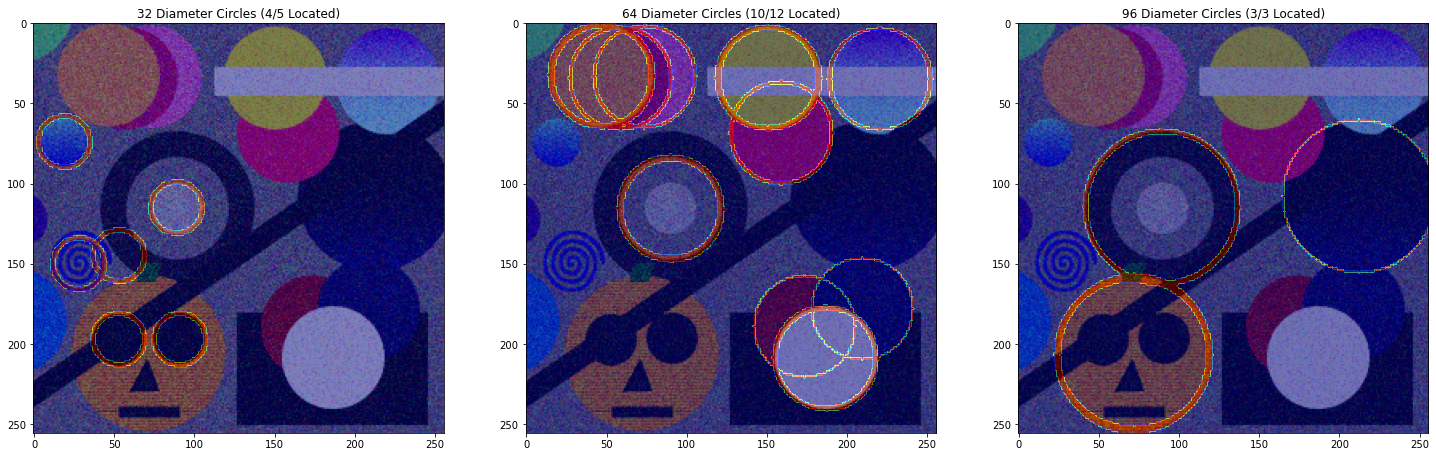

In [19]:
plt.rcParams['figure.figsize'] = [25, 25]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(cv2.cvtColor(cv2.imread('circles.png'), cv2.COLOR_BGR2RGB), cmap='gray')
ax1.imshow(circs_small, cmap='jet', alpha=0.5)

ax2.imshow(cv2.cvtColor(cv2.imread('circles.png'), cv2.COLOR_BGR2RGB), cmap='gray')
ax2.imshow(circles_out_med, cmap='jet', alpha=0.55)

ax3.imshow(cv2.cvtColor(cv2.imread('circles.png'), cv2.COLOR_BGR2RGB), cmap='gray')
ax3.imshow(circles_out_large, cmap='jet', alpha=0.55)

ax1.title.set_text('32 Diameter Circles (4/5 Located)')
ax2.title.set_text('64 Diameter Circles (10/12 Located)')
ax3.title.set_text('96 Diameter Circles (3/3 Located)')

plt.show()

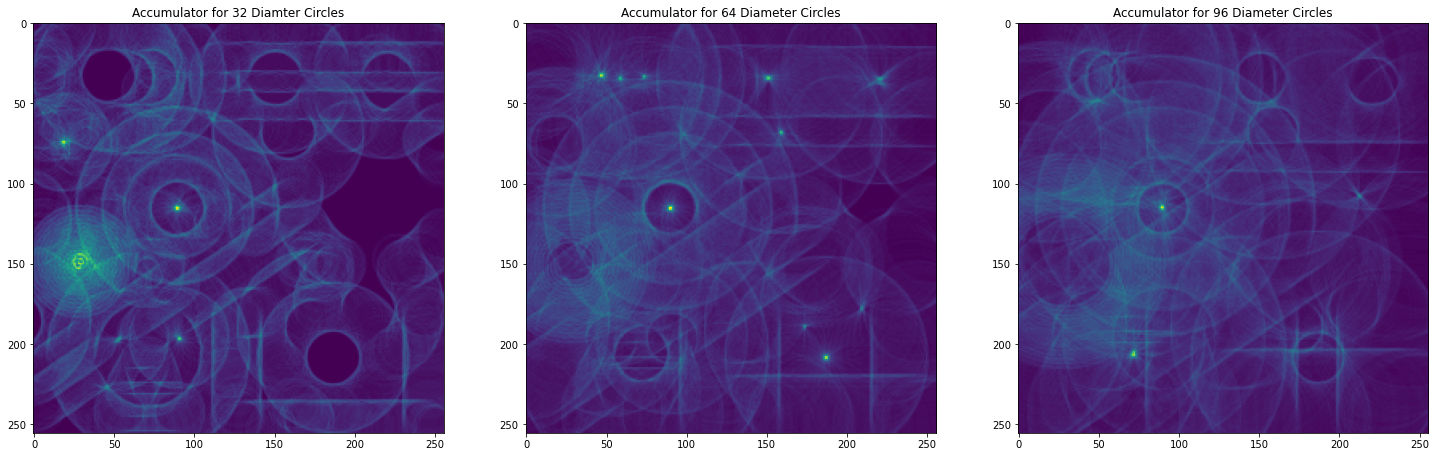

In [20]:
fig2, (ax2_1, ax2_2, ax2_3) = plt.subplots(1,3)

ax2_1.imshow(acc_small)
ax2_2.imshow(acc_med)
ax2_3.imshow(acc_large)

ax2_1.title.set_text('Accumulator for 32 Diamter Circles')
ax2_2.title.set_text('Accumulator for 64 Diameter Circles')
ax2_3.title.set_text('Accumulator for 96 Diameter Circles')
plt.show()

##### Part B: Write-up

***Response:*** This hough transformation assignment was quite the undertaking, but I got pretty close.

There were a few things that I struggled with:

First, I spent a lot of time trying to smooth the image to a degree of which I could actually get some hough transforms resembling circles from the image. I tried putting the color channels through a median and box filter, then hsv color separations, then a manual filter of thresholding all values of r, g, b above some value and summing them. Finally I chose to just apply a canny filter function, which smoothed to a workable edge detection image.

Second, I struggled with too many false positives on the 32 diameter circles so I chose to remove circles near each other. I also was unable to create a method of getting the circles outside of the image. The function I made seemed to  need improvements with balancing sensitivity toward getting too many false positives and having enough crossings to get those circles on the outside. 

Overall, I was able to get all but those 3 circles on the outside. It was a great learning experience and it taught me quite a bit about object detection in Python. 

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

